In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
from scipy import stats


df1 = pd.read_csv('All_Data_p.csv')


In [ ]:
df
df = df1.drop(df1[df1['blocktype'] == "self"].index)
df = df.drop(df[df['blocktype'] == "advice"].index)
df = df.drop(df[df['blocktype'] == "4"].index)

In [ ]:
ids = df["id"].values
unique_ids = set(ids)
rewards = df["choice"].values
blocktype = df["blocktype"].values
paranoia = df["RGPTS_persecution"].values
trialnums = df["trialnum"].values
reactime = df["rt"].values

In [ ]:
tot_rewards_id = {}
tot_rewards_advice = {}
tot_rewards_self = {}
tot_self = {}
tot_advice = {}
tot_paranoia = {}
tot_reac_time = {}
for id in unique_ids:
  tot_rewards_id[id] = 0
  tot_self[id] = 0
  tot_advice[id] = 0
  tot_paranoia[id] = 0
  tot_rewards_advice[id] = 0
  tot_rewards_self[id] = 0
  tot_reac_time[id] = 0
for i in range(len(ids)):
  tot_rewards_id[ids[i]] += int(rewards[i])
  if trialnums[i] == 4:
    tot_self[ids[i]] = int(rewards[i])
  #if blocktype[i] == "eavesdrop":
  #  tot_self[ids[i]] += 1
  #  tot_rewards_self[ids[i]] += int(rewards[i])
  #elif blocktype[i] == "advice":
  #  tot_advice[ids[i]] += 1
  #  tot_rewards_advice[ids[i]] += int(rewards[i])
  tot_paranoia[ids[i]] = paranoia[i]

In [ ]:
tot_paranoia = {}
tot_reac_time = {}
tot_cnt = {}
for id in unique_ids:
  tot_paranoia[id] = 0
for i in range(15):
  tot_reac_time[i] = 0;
  tot_cnt[i] = 0;
for i in range(len(ids)):
  #tot_rewards_id[ids[i]] += int(rewards[i])
  tot_reac_time[trialnums[i]] += reactime[i]
  tot_cnt[trialnums[i]] += 1
  tot_paranoia[ids[i]] = paranoia[i]

In [ ]:
tot_self = list(tot_self.values())
tot_advice = list(tot_advice.values())
tot_paranoia = list(tot_paranoia.values())
tot_rewards_id = list(tot_rewards_id.values())
tot_rewards_self = list(tot_rewards_self.values())
tot_rewards_advice = list(tot_rewards_advice.values())
#tot_rewards_self = tot_rewards_self / mean(tot_rewards_self)
#tot_rewards_advice = tot_rewards_advice / mean(tot_rewards_advice)
#for i in range(len(tot_rewards_advice)):
#  tot_rewards_self[i] = tot_rewards_self[i] / tot_rewards_advice[i]

In [ ]:
tot_reac_time = np.array(list(tot_reac_time.values()))
tot_cnt = np.array(list(tot_cnt.values()))
#tot_reac_time = tot_reac_time / tot_cnt
tot_reac_time = tot_reac_time/60

In [ ]:
tot_paranoia_dict_1 = {}
tot_paranoia_dict_0 = {}
for i in paranoia:
  tot_paranoia_dict_1[i] = 1
  tot_paranoia_dict_0[i] = 1
for i in range(len(tot_paranoia)):
  if tot_self[i] == 1:
    tot_paranoia_dict_1[tot_paranoia[i]] += 1
  else:
    tot_paranoia_dict_0[tot_paranoia[i]] += 1
paranoias = list(tot_paranoia_dict_0.keys())
tot_paranoia_dict_1 = list(tot_paranoia_dict_1.values())
tot_paranoia_dict_0 = list(tot_paranoia_dict_0.values())
ratio = np.array(tot_paranoia_dict_1 / np.array(tot_paranoia_dict_0))

SignificanceResult(statistic=-0.6776349406432265, pvalue=2.152588651068127e-06)


Text(10, 19, 'Spearmann: -0.677')

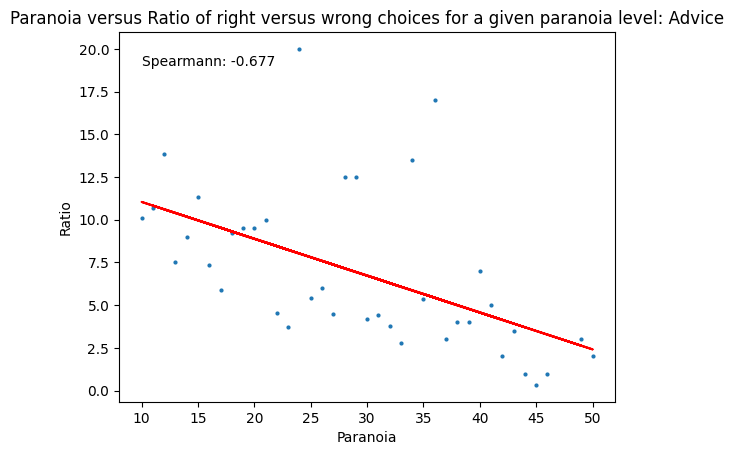

In [ ]:
a, b = np.polyfit(paranoias, ratio, 1)
spearman = stats.spearmanr(paranoias, ratio)
print(spearman)
plt.plot(paranoias, a*np.array(paranoias)+b, color="red")
plt.scatter(paranoias, ratio, s=4)
plt.title("Paranoia versus Ratio of right versus wrong choices for a given paranoia level: Advice")
plt.xlabel("Paranoia")
plt.ylabel("Ratio")
plt.text(10, 19, f"Spearmann: -0.677")
#plt.scatter(tot_paranoia, tot_rewards_advice)

SignificanceResult(statistic=-0.45015220672815615, pvalue=0.004034634740390612)


Text(10, 12, 'Spearmann: -0.450')

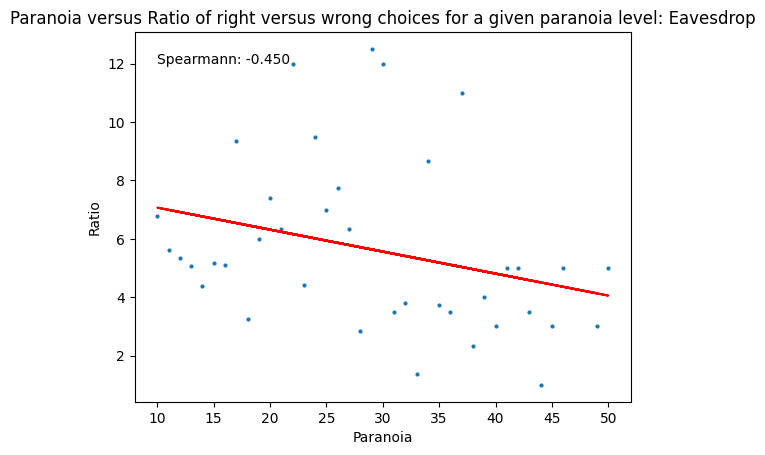

In [ ]:
a, b = np.polyfit(paranoias, ratio, 1)
spearman = stats.spearmanr(paranoias, ratio)
print(spearman)
plt.plot(paranoias, a*np.array(paranoias)+b, color="red")
plt.scatter(paranoias, ratio, s=4)
plt.title("Paranoia versus Ratio of right versus wrong choices for a given paranoia level: Eavesdrop")
plt.xlabel("Paranoia")
plt.ylabel("Ratio")
plt.text(10, 12, f"Spearmann: -0.450")
#plt.scatter(tot_paranoia, tot_rewards_advice)

SignificanceResult(statistic=-0.20374052719311925, pvalue=0.21347720362400127)


Text(10, 7.5, 'Spearmann: -0.677')

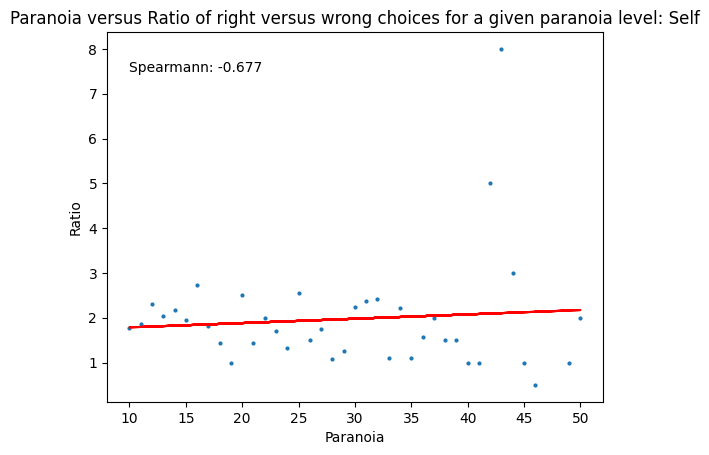

In [ ]:
a, b = np.polyfit(paranoias, ratio, 1)
spearman = stats.spearmanr(paranoias, ratio)
print(spearman)
plt.plot(paranoias, a*np.array(paranoias)+b, color="red")
plt.scatter(paranoias, ratio, s=4)
plt.title("Paranoia versus Ratio of right versus wrong choices for a given paranoia level: Self")
plt.xlabel("Paranoia")
plt.ylabel("Ratio")
plt.text(10, 7.5, f"Spearmann: -0.203")
#plt.scatter(tot_paranoia, tot_rewards_advice)

Text(0.5, 0, 'Trial number')

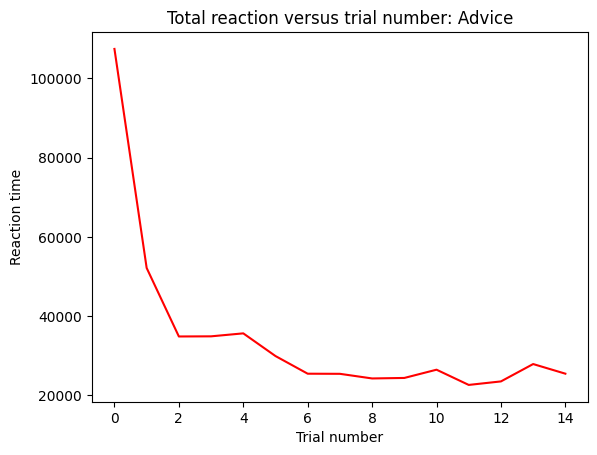

In [ ]:
plt.plot(tot_reac_time, color="red")
plt.title("Total reaction versus trial number: Advice")
plt.ylabel("Reaction time")
plt.xlabel("Trial number")

Text(0.5, 0, 'Trial number')

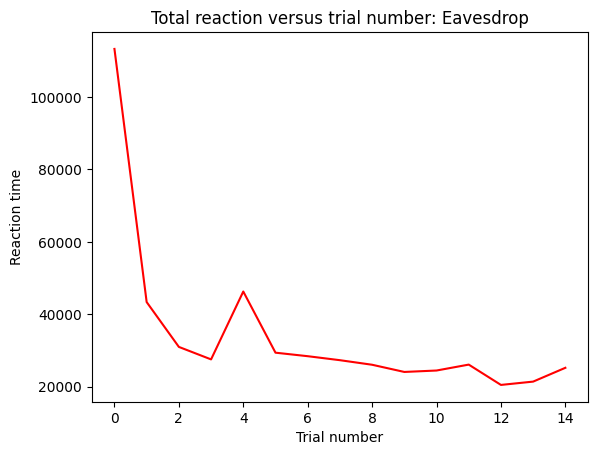

In [ ]:
plt.plot(tot_reac_time, color="red")
plt.title("Total reaction versus trial number: Eavesdrop")
plt.ylabel("Reaction time")
plt.xlabel("Trial number")

Text(0.5, 0, 'Trial number')

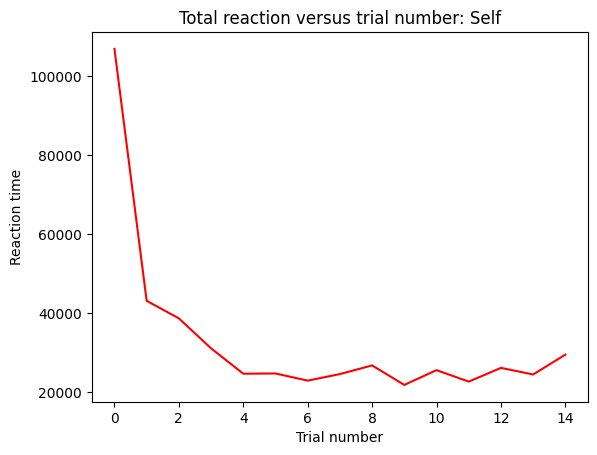

In [ ]:
plt.plot(tot_reac_time, color="red")
plt.title("Total reaction versus trial number: Self")
plt.ylabel("Reaction time")
plt.xlabel("Trial number")

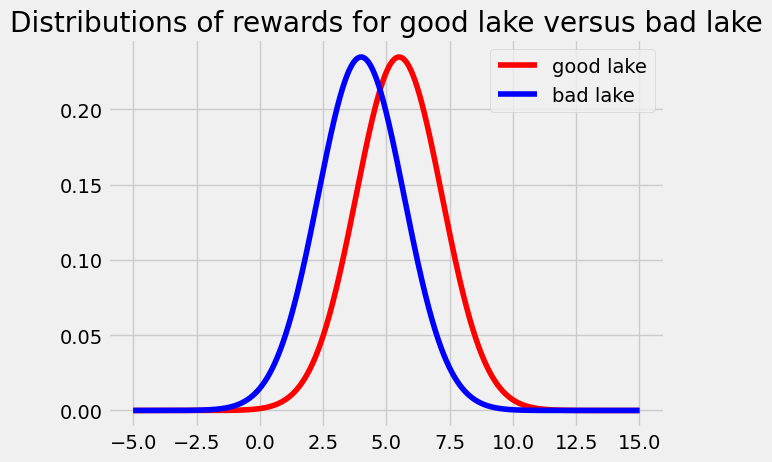

In [ ]:

import numpy as np
import scipy as sp
from scipy import stats
import matplotlib.pyplot as plt 
  
## generate the data and plot it for an ideal normal curve
  
## x-axis for the plot
x_data = np.arange(-5, 15, 0.001)
  
## y-axis as the gaussian
y_data_1 = stats.norm.pdf(x_data, 5.5, 1.7)
y_data_2 = stats.norm.pdf(x_data, 4, 1.7)

  
## plot data
plt.plot(x_data, y_data_1, color="red", label="good lake")
plt.plot(x_data, y_data_2, color="blue", label="bad lake")
plt.title("Distributions of rewards for good lake versus bad lake")
plt.legend()

In [ ]:
from scipy.stats import permutation_test
df = df1.drop(df1[df1['blocktype'] == "4"].index)
df = df.drop(df[df['blocktype'] == "advice"].index)
df = df.drop(df[df['blocktype'] == "self"].index)
df_4 = df[df['trialnum'] == 4]
df_5 = df[df['trialnum'] == 5]
r4 = df_4["rt"].values
r5 = df_5["rt"].values

In [ ]:
def t_test(x, y, axis):
    n1 = len(x)
    n2 = len(y)
    mean1 = sum(x) / n1
    mean2 = sum(y) / n2
    var1 = sum((xi - mean1)**2 for xi in x) / (n1 - 1)
    var2 = sum((yi - mean2)**2 for yi in y) / (n2 - 1)
    s = ((var1 / n1) + (var2 / n2))**0.5
    t = (mean1 - mean2) / s
    df = n1 + n2 - 2
    p = (1 - stats.t.cdf(abs(t), df)) * 2
    return t

In [ ]:
res = permutation_test((r4, r5), t_test, vectorized=True, n_resamples=100000, alternative='less')

Text(0.5, 1.0, 'Results of permuation test: Eavesdrop')

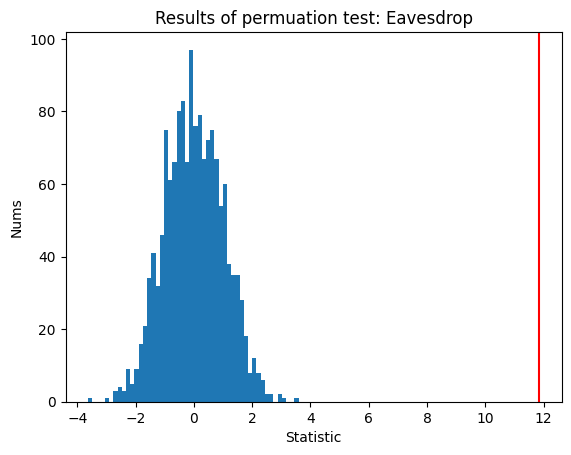

In [ ]:
plt.hist(res.null_distribution, bins=50)
plt.axvline(x=res.statistic, color='r')
plt.xlabel("Statistic")
plt.ylabel("Nums")
plt.title("Results of permuation test: Eavesdrop")

In [ ]:
from scipy.stats import permutation_test
df = df1.drop(df1[df1['blocktype'] == "4"].index)
df = df.drop(df[df['blocktype'] == "eavesdrop"].index)
df = df.drop(df[df['blocktype'] == "self"].index)
df_4 = df[df['trialnum'] == 4]
df_5 = df[df['trialnum'] == 5]
r4 = df_4["rt"].values
r5 = df_5["rt"].values

In [ ]:
res = permutation_test((r4, r5), t_test, vectorized=True, n_resamples=100000, alternative='less')

Text(0.5, 1.0, 'Results of permuation test: Advice')

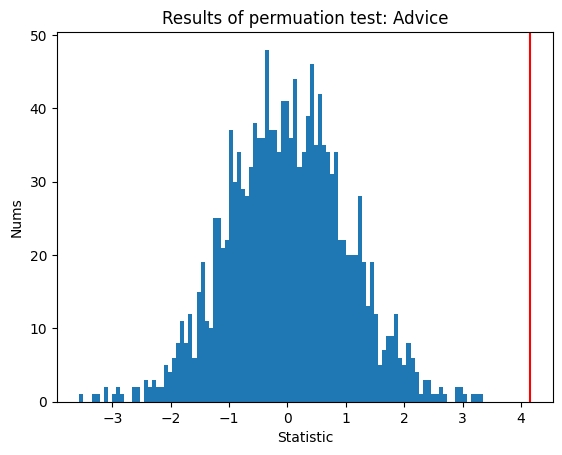

In [ ]:
plt.hist(res.null_distribution, bins=100)
plt.axvline(x=res.statistic, color='r')
plt.xlabel("Statistic")
plt.ylabel("Nums")
plt.title("Results of permuation test: Advice")

In [ ]:
from scipy.stats import permutation_test
df = df1.drop(df1[df1['blocktype'] == "4"].index)
df = df.drop(df[df['blocktype'] == "eavesdrop"].index)
df = df.drop(df[df['blocktype'] == "advice"].index)
df_4 = df[df['trialnum'] == 4]
df_5 = df[df['trialnum'] == 5]
r4 = df_4["rt"].values
r5 = df_5["rt"].values

In [ ]:
res = permutation_test((r4, r5), t_test, vectorized=True, n_resamples=100000, alternative='less')

Text(0.5, 1.0, 'Results of permuation test: Self')

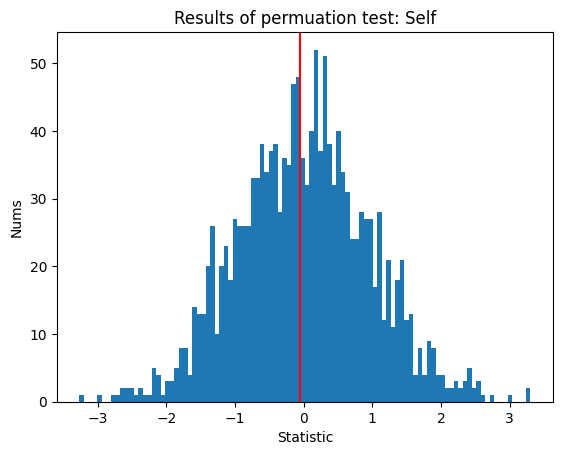

In [ ]:
plt.hist(res.null_distribution, bins=100)
plt.axvline(x=res.statistic, color='r')
plt.xlabel("Statistic")
plt.ylabel("Nums")
plt.title("Results of permuation test: Self")